In [3]:
%matplotlib notebook
import importlib
from matplotlib import pyplot as plt
from input_encoding.population_coding.utils import gaussian, gen_population_coding
import lvq
from lvq.lvq1 import LVQ1
from lvq.lvq2 import LVQ2
from sklearn import datasets
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from som import SOM


In [40]:
importlib.reload(lvq.lvq1)
importlib.reload(lvq.lvq2)
from lvq.lvq2 import LVQ2
from lvq.lvq1 import LVQ1


In [5]:
iris = load_iris()
X = iris.data
y = iris.target
n_neuron_per_dim = 10
sigma_ratio = 0.1
X.shape
x_min, x_max = np.min(X, 0), np.max(X, 0)

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_norm = scaler.transform(X)
# X, X_norm, y = shuffle(X, X_norm, y, random_state=1)

In [35]:
# Create population coding of the Iris data
u_data = np.zeros(shape=X.shape+(n_neuron_per_dim,))
for i in range(X.shape[0]):
    x = X[i,:]
    u_data[i,:,:] = gen_population_coding(x, x_min, x_max, n_neuron_per_dim, sigma_ratio)

u_data_flat = u_data.reshape((u_data.shape[0], u_data.shape[1]*u_data.shape[2] ))
u_data_flat = 200 * u_data_flat
example_protos = u_data_flat[[1,51,101]]
print(u_data_flat)
print(example_protos)

[[ 16. 108. 200. ...   0.   0.   0.]
 [ 50. 172. 172. ...   0.   0.   0.]
 [108. 200. 108. ...   0.   0.   0.]
 ...
 [  0.   0.   0. ... 198. 124.  22.]
 [  0.   0.   2. ...  76. 192. 142.]
 [  0.   0.  16. ... 158.  40.   2.]]
[[ 50. 172. 172.  50.   4.   0.   0.   0.   0.   0.   0.   2.  30. 142.
  192.  76.   8.   0.   0.   0. 158. 182.  60.   6.   0.   0.   0.   0.
    0.   0. 184. 158.  40.   2.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   8.  76. 192. 142.  30.   2.   0.   0.   0.   4.  50.
  172. 172.  50.   4.   0.   0.   0.   0.   0.   6.  66. 186. 152.  36.
    2.   0.   0.   0.   0.   8.  76. 192. 142.  30.   2.   0.]
 [  0.   2.  30. 142. 192.  76.   8.   0.   0.   0.   2.  40. 158. 184.
   62.   6.   0.   0.   0.   0.   0.   0.   0.   0.   8.  76. 192. 142.
   30.   2.   0.   0.   0.   0.   2.  30. 142. 192.  76.   8.]]


In [41]:
n_epochs = 100
alpha = 0.02
alpha_decay = 'hill'
init_protos = np.copy(example_protos)
init_protos = np.flip(init_protos, axis=0)
random_state=np.random.randint(1000)
test_size = 0.8

#---------------------------------------------------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
X_norm_train, X_norm_test, _, _ = train_test_split(X_norm, y, test_size=test_size, random_state=random_state)
X_pop_train, X_pop_test, _, _ = train_test_split(u_data_flat, y, test_size=test_size, random_state=random_state)

# #---------------------------------------------------------------------------------------------------
# mlvq1 = LVQ1(bmu_metric='euclidean', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)

# mlvq1.train_prototypes(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test,
#                        alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------
# mlvq2 = LVQ2(bmu_metric='euclidean', random_protos=True, alpha_decay=alpha_decay,
#              n_protos_per_class=1, n_class=3, record_pt_evolve=True)

# mlvq2.train_prototypes(x_train=X_pop_train, y_train=y_train, x_test=X_pop_test, y_test=y_test,
#                        alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------
# mlvq9 = LVQ2(bmu_metric='euclidean', random_protos=False, alpha_decay=alpha_decay,
#              init_protos=np.copy(init_protos),
#              n_protos_per_class=1, n_class=3, record_pt_evolve=True)

# mlvq9.train_prototypes(x_train=X_pop_train, y_train=y_train, x_test=X_pop_test, y_test=y_test,
#                        alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------
# mlvq10 = LVQ2(bmu_metric='euclidean', random_protos=False, alpha_decay=alpha_decay,
#              init_protos=np.copy(example_protos),
#              n_protos_per_class=1, n_class=3, record_pt_evolve=True)

# mlvq10.train_prototypes(x_train=X_pop_train, y_train=y_train, x_test=X_pop_test, y_test=y_test,
#                         alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------
mlvq3 = LVQ1(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay,
             n_protos_per_class=1, n_class=3, record_pt_evolve=True)

mlvq3.train_prototypes(x_train=X_pop_train, y_train=y_train, x_test=X_pop_test, y_test=y_test,
                       alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------
# mlvq4 = LVQ2(bmu_metric='dot_product', random_protos=False, alpha_decay=alpha_decay,
#              init_protos=np.copy(example_protos),
#              n_protos_per_class=1, n_class=3, record_pt_evolve=True)

# mlvq4.train_prototypes(x_train=X_pop_train, y_train=y_train, x_test=X_pop_test, y_test=y_test,
#                        alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
#---------------------------------------------------------------------------------------------------
mlvq8 = LVQ1(bmu_metric='dot_product', random_protos=False, alpha_decay=alpha_decay,
             init_protos=np.copy(init_protos),
             n_protos_per_class=1, n_class=3, record_pt_evolve=True)

mlvq8.train_prototypes(x_train=X_pop_train, y_train=y_train, x_test=X_pop_test, y_test=y_test,
                       alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------
# mlvq5 = LVQ1(bmu_metric='euclidean', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)

# mlvq5.train_prototypes(x_train=X_norm_train, y_train=y_train, x_test=X_norm_test, y_test=y_test,
#                        alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------
# mlvq6 = LVQ1(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)

# mlvq6.train_prototypes(x_train=X_train, y_train=y_train, x_test=X_test, y_test=y_test,
#                        alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------
# mlvq7 = LVQ1(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)

# mlvq7.train_prototypes(x_train=X_norm_train, y_train=y_train, x_test=X_norm_test, y_test=y_test,
#                        alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)
# #---------------------------------------------------------------------------------------------------

Initial prototypes:
 [[  -4.3  -67.1   51.8  171.6   10.3  119.9   28.8  -18.9  -35.8   18.5
    24.5  -45.1  -34.8  119.    59.5   66.6   93.8   70.2   49.5   37.2
    45.5   94.4   23.2  -18.2  -22.1    8.    56.9  -11.6  -52.    20.5
    12.1  -49.7   23.7  -99.6  -98.2  120.2  -38.1  137.5   36.4   35. ]
 [  52.    34.6   70.1   55.6   88.    35.   130.3   30.7   22.4    4.4
    12.1  -43.3   85.9  142.3   77.2   62.1  155.   135.9   89.9    5.4
   162.9   14.3    7.5   17.2   17.9  143.1  -33.9   19.6  175.2   30.6
    37.8 -147.    87.6   34.   278.3   37.3   13.    76.3   20.8  -68.7]
 [   4.2  130.5  174.7    1.4    5.2  145.7    7.3  -26.6   23.1   61.1
   -24.6   98.7  -31.4  -56.6  219.6   82.9   -5.1  -19.3  -59.6  -27.6
    66.7  209.1   30.9   -1.5   93.1   96.2  111.7  -66.6  -60.3  -23.1
     0.9  119.1  -21.    21.7  118.8  131.8   32.   100.3   76.6   23.6]]
>epoch=0, lrate=0.020, error=16275.251, tr_err=0.633, test_err=0.717
>epoch=1, lrate=0.020, error=16303.383, tr

>epoch=17, lrate=0.020, error=8934.736, tr_err=0.033, test_err=0.042
>epoch=18, lrate=0.020, error=8686.991, tr_err=0.033, test_err=0.050
>epoch=19, lrate=0.020, error=8543.137, tr_err=0.033, test_err=0.050
>epoch=20, lrate=0.019, error=8420.243, tr_err=0.033, test_err=0.050
>epoch=21, lrate=0.019, error=8344.833, tr_err=0.033, test_err=0.050
>epoch=22, lrate=0.019, error=8279.710, tr_err=0.033, test_err=0.050
>epoch=23, lrate=0.019, error=8253.073, tr_err=0.033, test_err=0.050
>epoch=24, lrate=0.019, error=8217.972, tr_err=0.033, test_err=0.050
>epoch=25, lrate=0.019, error=8214.987, tr_err=0.033, test_err=0.050
>epoch=26, lrate=0.019, error=8208.236, tr_err=0.033, test_err=0.050
>epoch=27, lrate=0.018, error=8188.304, tr_err=0.033, test_err=0.050
>epoch=28, lrate=0.018, error=8168.523, tr_err=0.033, test_err=0.050
>epoch=29, lrate=0.018, error=8180.032, tr_err=0.033, test_err=0.050
>epoch=30, lrate=0.018, error=8155.243, tr_err=0.033, test_err=0.050
>epoch=31, lrate=0.017, error=8156

array([[ 29.11,  91.29, 137.73, 115.13,  58.49,  13.12,   0.85,  -0.03,
         -0.03,  -0.02,  -0.  ,   0.01,   1.59,  13.12,  46.83,  89.48,
        108.18,  80.22,  53.34,  39.79, 134.6 , 150.  ,  82.68,  13.33,
          0.21,   0.02,   0.03,   0.04,  -0.02,  -0.02, 141.01, 149.95,
         78.71,  12.89,   0.87,   0.  ,   0.04,   0.03,   0.01,  -0.01],
       [  0.  ,   4.86,  37.42, 104.83, 149.87, 113.34,  35.22,   3.78,
         -0.01,  -0.03,  17.71,  75.12, 119.67, 103.66,  65.42,  41.51,
         21.46,   4.26,   0.27,  -0.  ,  -0.  ,  -0.01,   4.28,  39.75,
        124.07, 149.96,  96.86,  28.54,   2.64,  -0.08,  -0.01,   1.13,
         15.71,  71.49, 137.18, 137.21,  71.48,  15.28,   0.81,  -0.18],
       [  0.  ,   0.67,   8.  ,  33.47,  78.28, 112.15,  82.51,  46.71,
         46.2 ,  33.  ,   2.  ,  16.15,  55.3 , 115.96, 133.68,  74.21,
         28.35,  17.51,   6.33,   0.66,   0.  ,   0.  ,  -0.  ,  -0.  ,
          5.5 ,  44.34, 122.8 , 137.28,  90.68,  40.7 ,   0.  

<IPython.core.display.Javascript object>


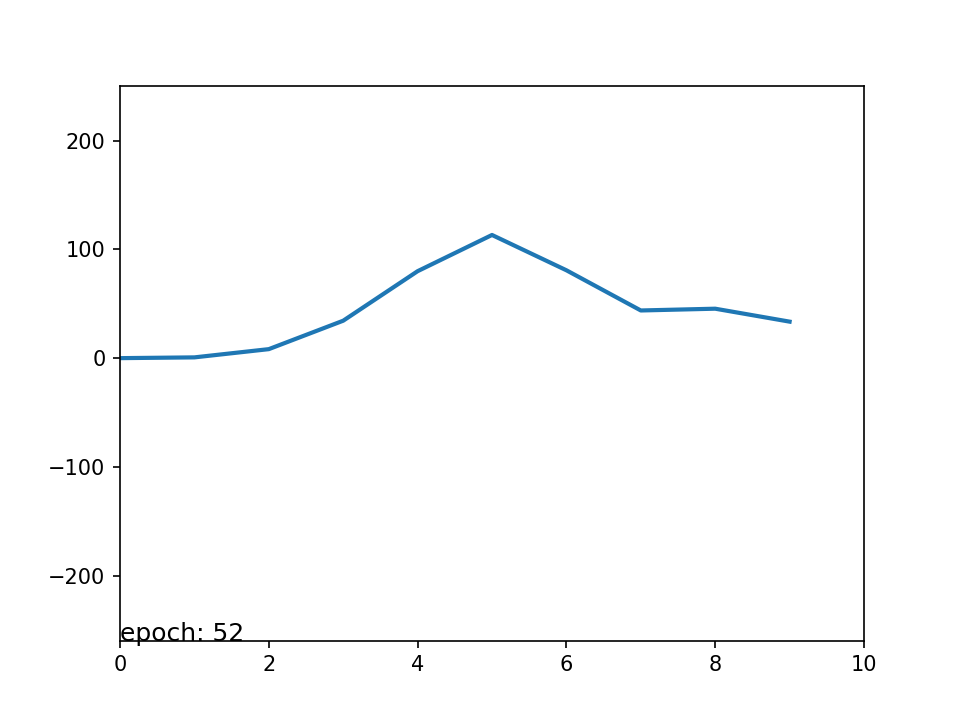

In [49]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, n_neuron_per_dim), ylim=(-260, 250))
line, = ax.plot([], [], lw=2)
tex = ax.text(0, 0, "", fontsize=12,  transform=ax.transAxes)
x=np.arange(n_neuron_per_dim)
pt_evolve = mlvq8.proto_evolve[2]


# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    tex.set_text("epoch:")
    return line,#tex,

# animation function.  This is called sequentially
def animate(i):
    y = pt_evolve[i][1][:n_neuron_per_dim]
    tex.set_text("epoch: "+str(pt_evolve[i][0]))
    line.set_data(x, y)
    return line,#tex,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=int(len(pt_evolve)/2), interval=1, blit=True, repeat=False)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

plt.show()

In [50]:
f = r"c://Users/ehajizad/lava-nc/neuromorphic-continual-learning/tutorials/gifs/lvq1_bad_init_bigger_negative_bound.gif" 
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)

<IPython.core.display.Javascript object>


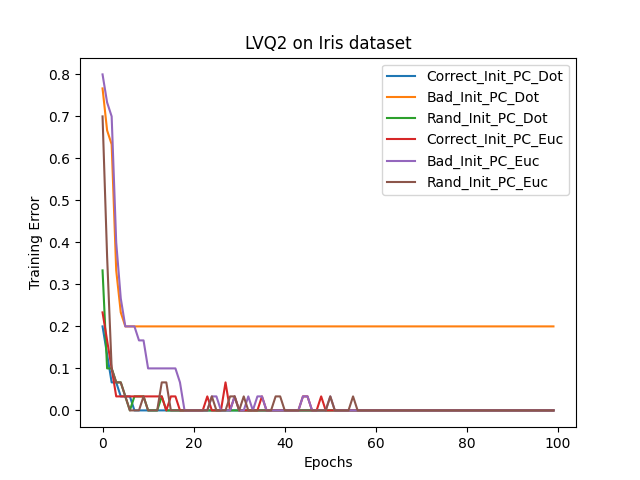

In [63]:
plt.figure()
plt.plot(mlvq4.train_errors)
plt.plot(mlvq8.train_errors)
plt.plot(mlvq3.train_errors)
plt.plot(mlvq10.train_errors)
plt.plot(mlvq9.train_errors)
plt.plot(mlvq2.train_errors)
plt.legend(["Correct_Init_PC_Dot",
            "Bad_Init_PC_Dot",
            "Rand_Init_PC_Dot",
            "Correct_Init_PC_Euc",
            "Bad_Init_PC_Euc",
            "Rand_Init_PC_Euc"])
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("LVQ2 on Iris dataset")

plt.show()

<IPython.core.display.Javascript object>


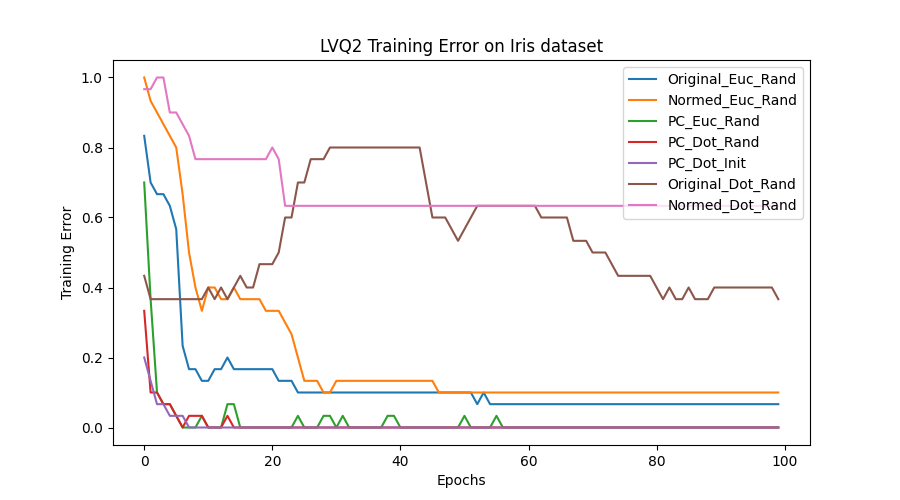

In [64]:
plt.figure(figsize=(9,5))
plt.plot(mlvq1.train_errors)
plt.plot(mlvq5.train_errors)
plt.plot(mlvq2.train_errors)
plt.plot(mlvq3.train_errors)
plt.plot(mlvq4.train_errors)
plt.plot(mlvq6.train_errors)
plt.plot(mlvq7.train_errors)
plt.legend(["Original_Euc_Rand",
            "Normed_Euc_Rand",
            "PC_Euc_Rand", 
            "PC_Dot_Rand",
            "PC_Dot_Init",
            "Original_Dot_Rand",
            "Normed_Dot_Rand"])
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.title("LVQ2 Training Error on Iris dataset")

plt.show()

<IPython.core.display.Javascript object>


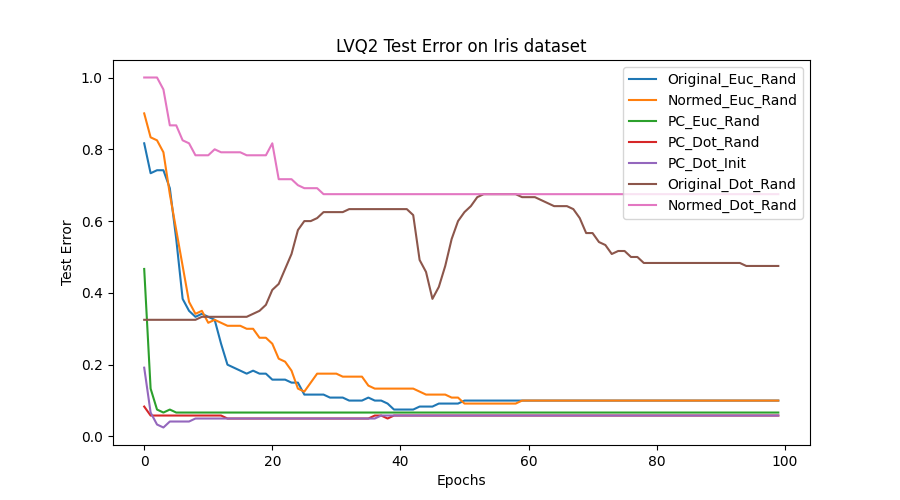

In [65]:
plt.figure(figsize=(9,5))
plt.plot(mlvq1.test_errors)
plt.plot(mlvq5.test_errors)
plt.plot(mlvq2.test_errors)
plt.plot(mlvq3.test_errors)
plt.plot(mlvq4.test_errors)
plt.plot(mlvq6.test_errors)
plt.plot(mlvq7.test_errors)
plt.legend(["Original_Euc_Rand",
            "Normed_Euc_Rand",
            "PC_Euc_Rand", 
            "PC_Dot_Rand",
            "PC_Dot_Init",
            "Original_Dot_Rand",
            "Normed_Dot_Rand"])
plt.xlabel("Epochs")
plt.ylabel("Test Error")
plt.title("LVQ2 Test Error on Iris dataset")

plt.show()

<IPython.core.display.Javascript object>


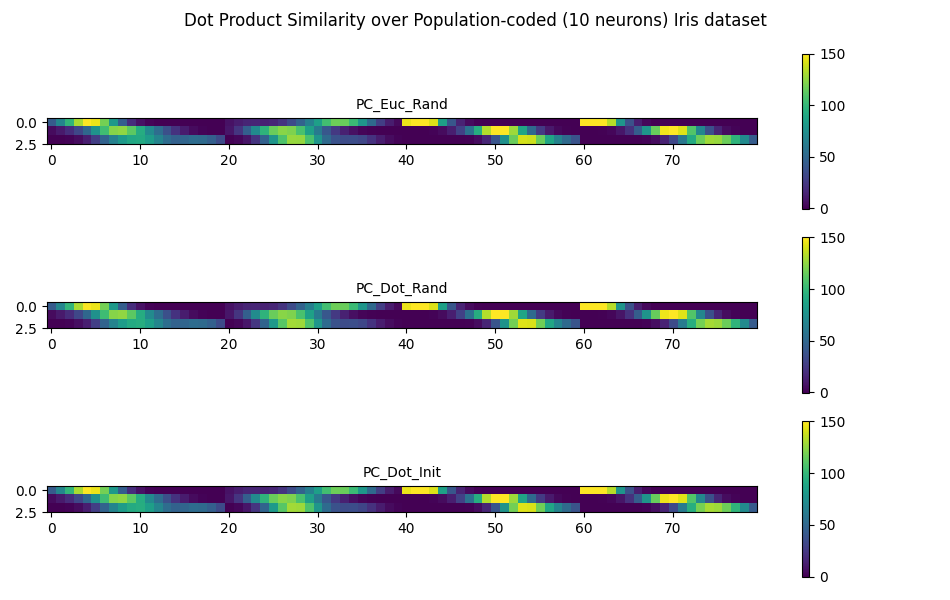

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(9.5,6))

im1 = ax1.imshow(mlvq2.prototypes)
im2 = ax2.imshow(mlvq3.prototypes)
im3 = ax3.imshow(mlvq4.prototypes)
ax1.set_title("PC_Euc_Rand", fontsize=10)
ax2.set_title("PC_Dot_Rand", fontsize=10)
ax3.set_title("PC_Dot_Init", fontsize=10)
fig.colorbar(im1, ax=ax1)
fig.colorbar(im2, ax=ax2)
fig.colorbar(im3, ax=ax3)
fig.suptitle("Dot Product Similarity over Population-coded (10 neurons) Iris dataset")
plt.tight_layout()
plt.show()

In [79]:
n_epochs = 20
alpha = 0.01
alpha_decay = 'hill'
init_protos = np.copy(example_protos)
init_protos = np.flip(init_protos, axis=0)
random_state=np.random.randint(1000)
test_size = 0.5

#---------------------------------------------------------------------------------------------------
X_pop_train, X_pop_test, y_train, y_test = train_test_split(u_data_flat, y, test_size=test_size,
                                                            random_state=random_state)
#---------------------------------------------------------------------------------------------------

lvqs = []
for n in range(1,4):
    lvqs.append(LVQ2(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay,
                     n_protos_per_class=n, n_class=3))
    
    lvqs[n-1].train_prototypes(x_train=X_pop_train, y_train=y_train, x_test=X_pop_test, y_test=y_test,
                               alpha_start=alpha, n_epochs=n_epochs, test_each_epoch=True)


Initial prototypes:
 [[ 36.8  42.6  76.4 101.8  60.1   9.6  18.2  68.5  41.6  15.9  11.1  69.5
   27.9 137.   97.9  69.8  20.2  30.1  55.3  24.9  67.3  88.4  17.9 106.8
   52.9  99.  122.1   2.   69.1  60.7  80.5  26.1  13.8   4.7  13.  102.7
   58.1  29.1  59.2  13.6]
 [ 12.6 115.   60.7  74.5  32.3 168.2 167.   70.4  13.2  67.9  33.1  92.1
   14.9  31.2 195.1 166.3 104.6   7.6  20.2  20.8 180.3 109.3  21.8  63.1
   87.7 113.3 169.9 158.   53.9   7.1  34.   52.3  62.2  10.5  15.7  48.2
  149.4  37.9  88.   41.6]
 [ 15.7  31.8  59.   19.   39.6  72.6  57.4  69.   30.6  22.3  27.9  26.3
  147.7  72.5 125.6  99.1  91.5   3.1   5.5   2.3 184.3  93.   32.1  20.3
   22.2  61.7 173.4 167.7  16.6  38.8  11.   77.   24.   53.8 121.2 220.5
   97.1 145.9 131.1  51.8]]
>epoch=0, lrate=0.010, error=33145.408, tr_err=0.560, test_err=0.253
>epoch=1, lrate=0.010, error=29556.025, tr_err=0.107, test_err=0.027
>epoch=2, lrate=0.010, error=26687.685, tr_err=0.053, test_err=0.027
>epoch=3, lrate=0.010, e

>epoch=1, lrate=0.010, error=30298.852, tr_err=0.347, test_err=0.173
>epoch=2, lrate=0.010, error=28111.756, tr_err=0.213, test_err=0.133
>epoch=3, lrate=0.010, error=26204.083, tr_err=0.173, test_err=0.120
>epoch=4, lrate=0.010, error=24536.378, tr_err=0.107, test_err=0.107
>epoch=5, lrate=0.009, error=23198.079, tr_err=0.093, test_err=0.080
>epoch=6, lrate=0.009, error=22329.379, tr_err=0.080, test_err=0.067
>epoch=7, lrate=0.008, error=21770.838, tr_err=0.093, test_err=0.040
>epoch=8, lrate=0.007, error=21046.281, tr_err=0.067, test_err=0.040
>epoch=9, lrate=0.006, error=20794.330, tr_err=0.067, test_err=0.040
>epoch=10, lrate=0.004, error=20618.162, tr_err=0.067, test_err=0.040
>epoch=11, lrate=0.004, error=20427.514, tr_err=0.067, test_err=0.040
>epoch=12, lrate=0.003, error=20239.290, tr_err=0.067, test_err=0.040
>epoch=13, lrate=0.002, error=20194.460, tr_err=0.067, test_err=0.040
>epoch=14, lrate=0.002, error=19980.487, tr_err=0.053, test_err=0.040
>epoch=15, lrate=0.001, error

<IPython.core.display.Javascript object>


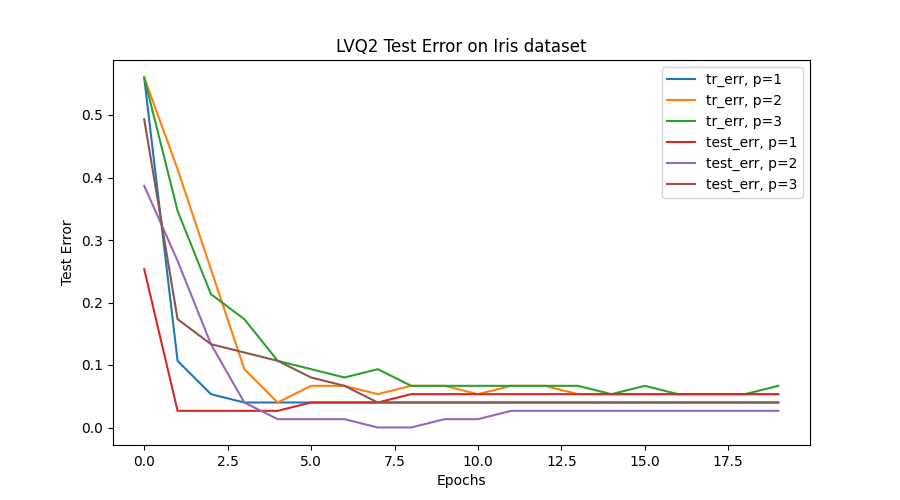

In [80]:
plt.figure(figsize=(9,5))
plt.plot(lvqs[0].train_errors)
plt.plot(lvqs[1].train_errors)
plt.plot(lvqs[2].train_errors)
plt.plot(lvqs[0].test_errors)
plt.plot(lvqs[1].test_errors)
plt.plot(lvqs[2].test_errors)
plt.legend(["tr_err, p=1",
            "tr_err, p=2",
            "tr_err, p=3", 
            "test_err, p=1",
            "test_err, p=2",
            "test_err, p=3"])
plt.xlabel("Epochs")
plt.ylabel("Test Error")
plt.title("LVQ2 Test Error on Iris dataset")

plt.show()

<IPython.core.display.Javascript object>


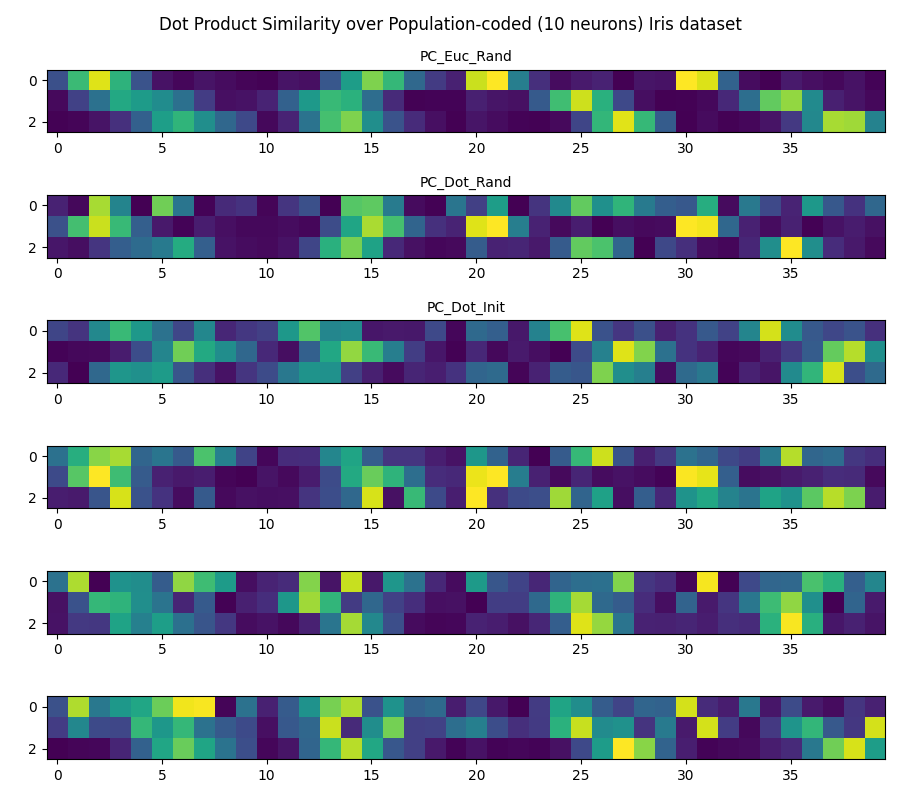

In [81]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, 1, figsize=(9,8))

im1 = ax1.imshow(lvqs[0].prototypes)
im2 = ax2.imshow(lvqs[1].prototypes[0:3], vmin=0, vmax=150)
im3 = ax3.imshow(lvqs[1].prototypes[3:6], vmin=0, vmax=150)
im2 = ax4.imshow(lvqs[2].prototypes[0:3], vmin=0, vmax=150)
im3 = ax5.imshow(lvqs[2].prototypes[3:6], vmin=0, vmax=150)
im3 = ax6.imshow(lvqs[2].prototypes[6:9], vmin=0, vmax=150)
ax1.set_title("PC_Euc_Rand", fontsize=10)
ax2.set_title("PC_Dot_Rand", fontsize=10)
ax3.set_title("PC_Dot_Init", fontsize=10)
fig.suptitle("Dot Product Similarity over Population-coded (10 neurons) Iris dataset")
plt.tight_layout()
plt.show()

In [82]:
data_and_protos = np.concatenate((u_data_flat.copy(), lvqs[0].prototypes, lvqs[1].prototypes, lvqs[2].prototypes), axis=0)

In [83]:
y_data_and_protos = np.concatenate((y,np.array([3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5])))

<IPython.core.display.Javascript object>


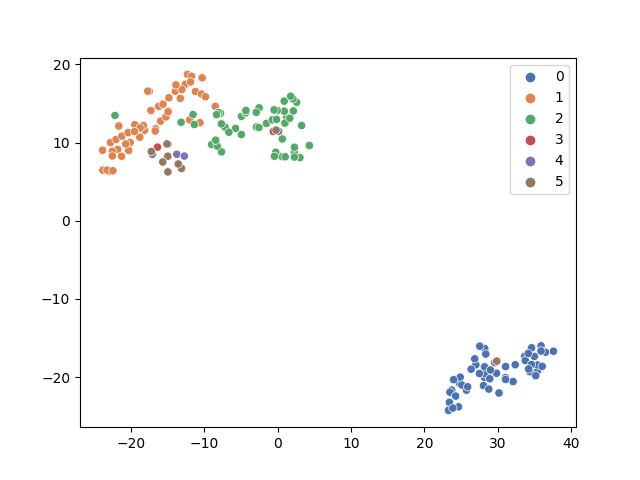

c:\users\ehajizad\lava-nc\venv\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\ehajizad\lava-nc\venv\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\users\ehajizad\lava-nc\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

In [84]:
plt.figure()

X_emb = TSNE(n_components=2, perplexity=20, n_iter=4000).fit_transform(data_and_protos)
sns.scatterplot(X_emb[:,0], X_emb[:,1], hue=y_data_and_protos, palette="deep")

<IPython.core.display.Javascript object>


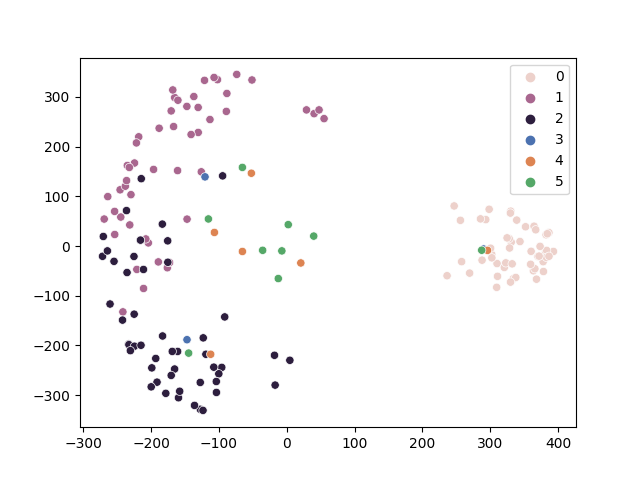

c:\users\ehajizad\lava-nc\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\ehajizad\lava-nc\venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

In [85]:
pca = PCA(n_components=2)
X_emb = pca.fit_transform(u_data_flat)

plt.figure()
sns.scatterplot(X_emb[:,0], X_emb[:,1], hue=y)

X_proto_emb = pca.transform(np.concatenate((lvqs[0].prototypes, lvqs[1].prototypes, lvqs[2].prototypes), axis=0))

sns.scatterplot(X_proto_emb[:,0], X_proto_emb[:,1], hue=np.array([3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5]), palette="deep")

<IPython.core.display.Javascript object>


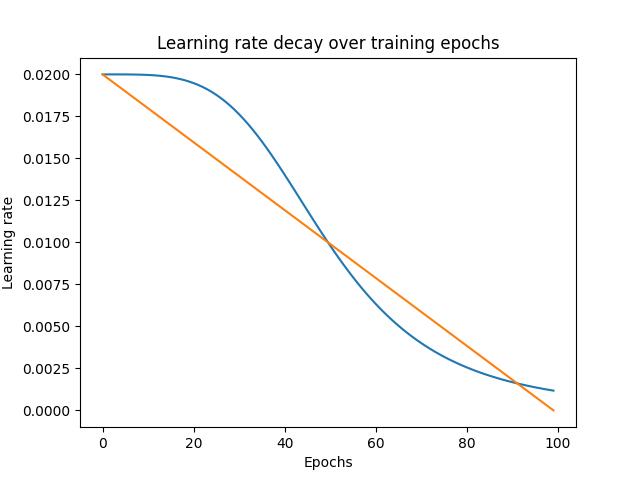

In [518]:
plt.figure()
alpha_start=0.02
n_epochs = 100
epoch_list = np.linspace(0, 1, n_epochs)
alphas_hill = alpha_start / (1 + (epoch_list / 0.5) ** 4)
alphas_linear = np.linspace(alpha_start, 0, n_epochs)
plt.plot(alphas_hill)
plt.plot(alphas_linear)
plt.xlabel("Epochs")
plt.ylabel("Learning rate")
plt.title("Learning rate decay over training epochs")
plt.show()

In [ ]:
n_neurons = np.arange(2,32,2)
sigmas = np.arange(0.01,0.16,0.01)
sigmas = [round(num, 2) for num in sigmas.tolist()]
n_epochs = 100
alpha = 0.02
alpha_decay = 'hill'
errors = np.zeros((len(n_neurons),len(sigmas)))
for n, n_neuron_per_dim in enumerate(n_neurons):
    for s, sigma_ratio in enumerate(sigmas):
        # Create population coding of the Iris data
        u_data = np.zeros(shape=X.shape+(n_neuron_per_dim,))
        for i in range(X.shape[0]):
            x = X[i,:]
            u_data[i,:,:] = gen_population_coding(x, x_min, x_max, n_neuron_per_dim, sigma_ratio)

        u_data_flat = u_data.reshape((u_data.shape[0], u_data.shape[1]*u_data.shape[2] ))
        print(u_data_flat)
        mlvq = LVQ1(bmu_metric='dot_product', random_protos=True, alpha_decay=alpha_decay, n_protos_per_class=1, n_class=3)
        mlvq.train_prototypes(data=u_data_flat, targets=y, alpha_start=alpha, n_epochs=n_epochs)
        errors[n,s] = mlvq.inf_errors[-1]

<IPython.core.display.Javascript object>


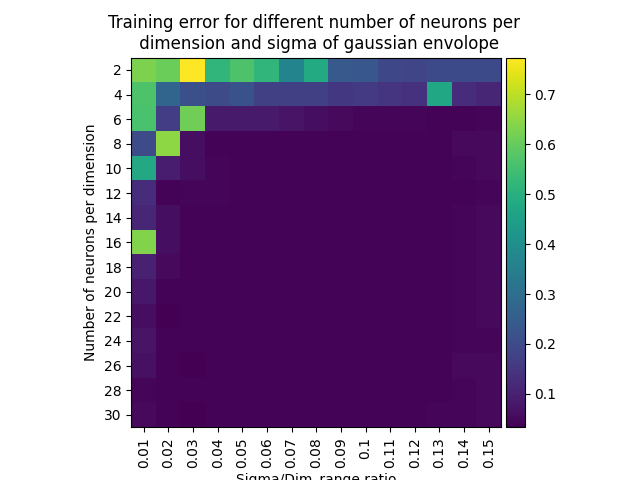

In [47]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure()
im=plt.imshow(errors)
ax = fig.axes[0]
plt.ylabel("Number of neurons per dimension")
plt.xlabel("Sigma/Dim_range ratio")

plt.xticks(np.arange(len(sigmas)),sigmas, rotation=90)
ax.set_yticks(np.arange(len(n_neurons)))
ax.set_yticklabels(n_neurons, fontsize=10)
# plt.xticks(sigmas)
# plt.yticks(n_neurons)
plt.title("Training error for different number of neurons per \n dimension and sigma of gaussian envolope")
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)

plt.colorbar(im, cax=cax)
plt.show()